In [ ]:
# Numpy
# 고성능 과학 계산을 위한 라이브러리
# Python 수치해석용 라이브러리
# List와 비슷한 형태의 자료구조인 Array
list1 = [1, 2, 3, 4, 5]
list2 = [6, 7, 8, 9, 10]
import numpy as np
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.array([6, 7, 8, 9, 10])
# list1의 요소와 list2의 요소를
# 각 매칭되는 index끼리 더해보자
list3 = []
for i in range(len(list1)):
    list3.append(list1[i] + list2[i])
list3

list4 = []
for i, j in zip(list1, list2):
    list4.append(i + j)
list4

list5 = [(i + j) in zip(list1, list2)]

arr1, arr2
arr3 = arr1 + arr2
arr3

# array를 쓰는 이유?
# list에서는 연산을 위해 반복문 O(n)
# array는 O(1)
# 반복문 없이 전체 데이터 연산 가능
print(arr3.mean())
print(sum(arr3))

# 다차원 배열 만들어보자
list6 = [[1, 2, 3],
          [4, 5, 6]]
arr6 = np.array(list6)
arr7 = np.array([[10, 20, 30], [40, 50, 60]])
arr6 + arr7

# 배열의 크기 확인하기
print(arr6.shape) # wine, cancer, iris 데이터에서 크기 확인하기 .shape
print(arr1.shape)

arr8 = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
arr8.shape

# 배열의 전체 요소 개수 : size
# size
print(arr1.size)
print(arr6.size)
print(arr8.size)

# 배열의 타입 확인 : dtype
# dtype
print(arr1.dtype)
print(arr1.dtype)
print(arr1.dtype)

# 배열의 차원 확인 : ndim
# dtype
print(arr1.ndim)
print(arr6.ndim)
print(arr8.ndim)

# array로 만들고 shape, size, ndim으로 확인!!

11.0
55
(2, 3)
(5,)
5
6
8
int64
int64
int64
1
2
3


In [ ]:
# 특정 값들로 array 만들기
# 1) 모든 값을 0으로
arr_zero = np.zeros((3,4))
arr_zero

# 2) 모든 값을 1로
arr_one = np.ones((3,4))
# arr_one = np.ones((3,4), dtype=np.int64) # 기본 float이나 생성 타입 설정 가능
arr_one

# 3) 모든 값을 특정 값으로
arr_twenty = np.full((3,4), 20)
# arr_twenty.astype("float") # astype으로 만들어진 배열의 타입 변환 가능
arr_twenty

# 4) 1 ~ 50까지 요소를 갖는 배열 만들기
arr_1_to_50 = np.arange(1, 51)
arr_1_to_50
# list7 = []
# for i in range(1, 51):
#     list7.append(i)
# list7 = [ i for in range(1, 51)]

# 5) 랜덤값 생성하기
arr_random = np.random.rand(3, 4) # 0 ~ 1
arr_random

# 랜덤 범위
arr_random_range1 = np.random.randint(1, 46)
arr_random_range1
arr_random_range2 = np.random.randint(1, 46, size=(3, 4))
arr_random_range2

array([[45, 33, 22,  9],
       [20,  5, 28, 43],
       [32, 27, 17,  3]], dtype=int32)

In [68]:
print(arr_random_range2)
# 배열 인덱싱 리스트와 동일하게
arr_random_range2[1][1]
# 슬라이싱도 마찬가지
arr_random_range2[1][1 : 4]

# 전체 행의 1열만 출력
arr_random_range2[:, 1]

# Boolean Indexing 가능!!
arr_random_range2[arr_random_range2 >= 10] # 10이상만 찾아서 넣고싶다.

# 합계 sum
sum(arr_random_range2)
np.sum(arr_random_range2)

# 평균 mean
np.mean(arr_random_range2)

# 제곱근 sqrt
np.sqrt(arr_random_range2)

# 절대값 abs
np.abs(arr_random_range2)

# 행열 바꾸기
arr_random_range2.reshape(2, 6)
arr_random_range2.reshape(2, -1) # 2행, ?열 <- 모르겠을 때

[[45 33 22  9]
 [20  5 28 43]
 [32 27 17  3]]


array([[45, 33, 22,  9, 20,  5],
       [28, 43, 32, 27, 17,  3]], dtype=int32)

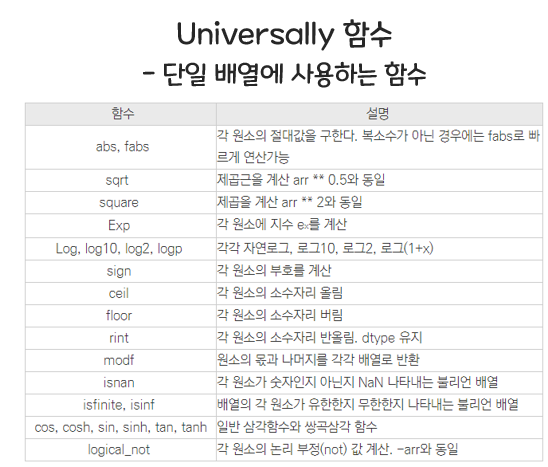

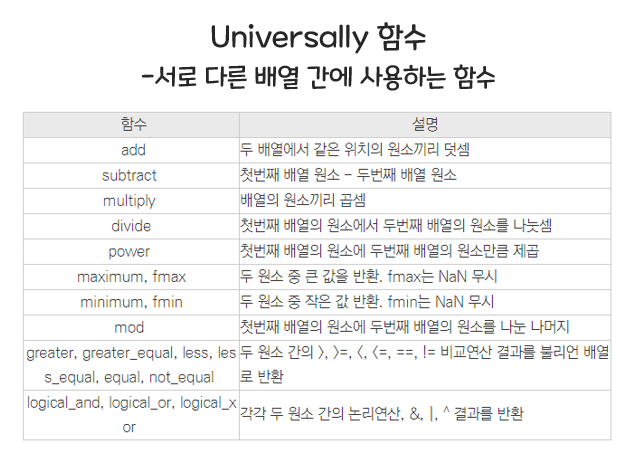

In [1]:
# SVM(Support Vector Machine)
# 각 클래스를 잘 구분하는 경계선을 만들자
# Margin : 경계선과 가장 가까운 데이터 샘플 사이의 거리
# Support Vector : 특징점을 잘 나타내는 데이터 샘플

# iris_dataset 활용
from sklearn.datasets import load_iris # 붗꽃 데이터 로드
from sklearn.model_selection import train_test_split # train, test 분할

from sklearn.svm import SVC # SVM을 활용한 분류

iris_dataset = load_iris()
iris_dataset.keys()

X = iris_dataset.data
y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

# SVM 계열은 거리를 사용하기 때문에
# 각 Feature들을 정규화 시킬 필요가 있다
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train) # scaler가 X_train을 살피면서 평균, 표준편차를 학습
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel="rbf", C=1.0, random_state=20)
svm.fit(X_train_scaled, y_train)

from sklearn.metrics import accuracy_score
y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_pred, y_test)
print(f"정확도 : {accuracy * 100: .2f}%")

정확도 :  92.11%


In [4]:
# 회귀(Regression)
# 선형 회귀(Linear Regression)
# 데이터에 가장 알맞은 직선을 찾는 알고리즘
# y = Wx + b (W(Weight)) : 가중치, b(bias) : 절편)

# 회귀 데이터를 가지고 진행해보자
from sklearn.datasets import make_regression # 선형회귀
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

l_r = LinearRegression()

import numpy as np
# 학습 시간에 따른 성적
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y= np.array([30, 50, 70, 90, 100]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
l_r.fit(X_train, y_train)

y_pred = l_r.predict(X_test)
from sklearn.metrics import accuracy_score
y_pred

array([[50.]])

In [ ]:
# 회귀(Regression)
X = [1, 2, 3, 4, 5]
y = [30, 50, 70, 90, 100]

# y =W * x + b
# 1차함수, 2차함수, 기울기, 미분, 편미분

# 실제값 = 예측값
# 오차 = 예측값 - 실제값
# 오차1 = y1 = W * x1 + b
# 오차2 = y1 = W * x1 + b

# 모든 오차의 제곱의 합
# (오차1 + 오차2 + ... + 오차5)^2


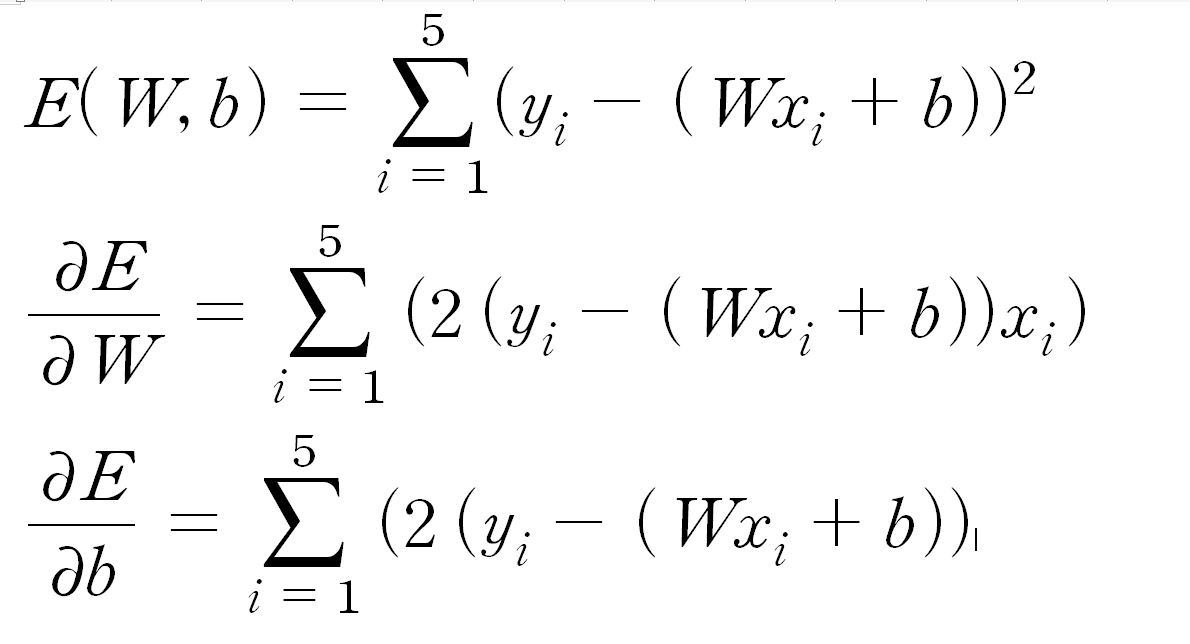

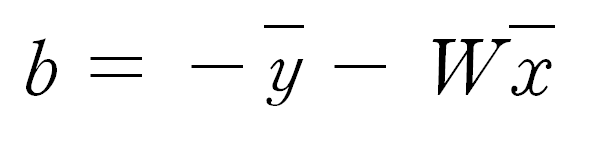


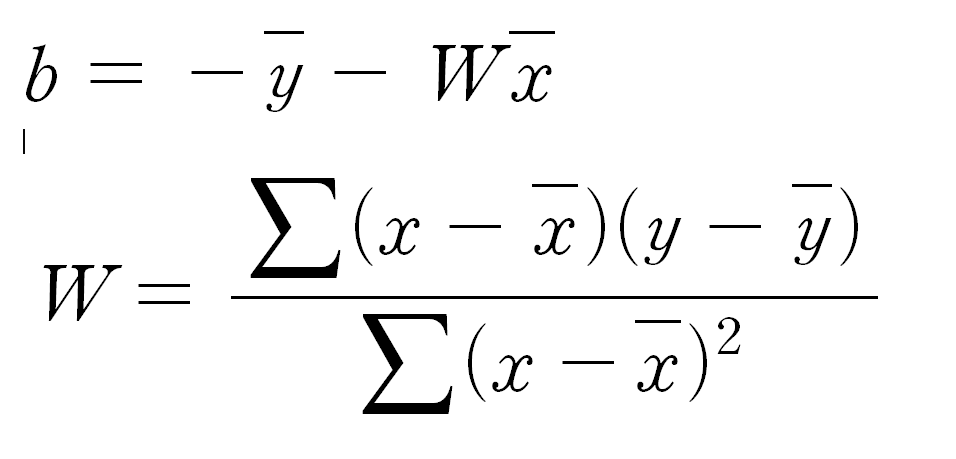

array([ 32.,  50.,  68.,  86., 104.])

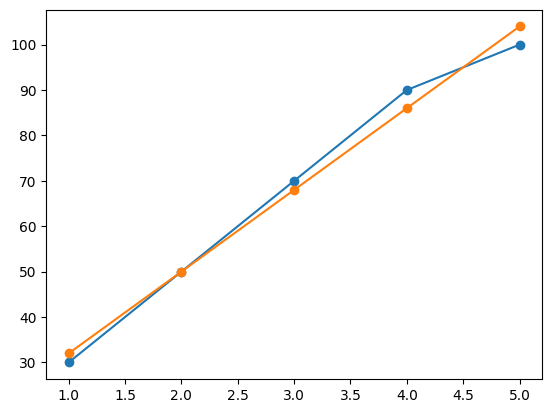

In [78]:
X = np.array([1, 2, 3, 4, 5])
y = np.array([30, 50, 70, 90, 100])
X_mean = np.mean(X)
y_mean = np.mean(y)
W_분모 = np.sum((X - X_mean) ** 2)
W_분자 = np.sum((X - X_mean) * (y - y_mean))
W = W_분자 / W_분모
b = y_mean -W * X_mean
def model(xi):
    return W * xi + b

import matplotlib.pyplot as plt
plt.plot(X, y, X, y_pred, marker="o")
plt.show

y_pred = model(X)
y_pred

In [ ]:
# 선형회귀 조금 더 다뤄보기
# 1) 지도 학습
#  가. 분류 : KNN, 결정트리, SVM
#  나. 회귀
#  -> y = Wx + b
#     y_pred와 y_test간의 오차가 적을 수록 좋은 모델이다

# MAE(Mean Absolute Error) : 절대값 차이 평균
# MSE (Mean Square Error) : 제곱 차이 평균
# RMSE (Root Mean Squeare Error) : MSE에 루트를 씌워 차원(단위)를 맞추자
# R^2 (결정 계수, Coefficient of Determination) : 얼마나 분산을 잘 설명하는지 나타냄
#  -> 1에 가까울 수록 좋은 모델이다.

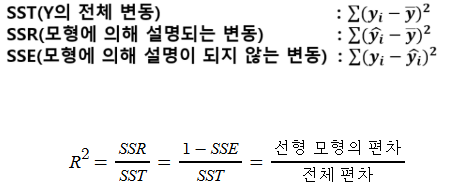


In [ ]:
# 당뇨, 인슐린 데이터
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)
# X_train 데이터가 몇 개일까요?
# column(feature)가 몇 개일까요?
X_train.shape # 331개의 데이터, 10개의 feature

from sklearn.linear_model import LinearRegression # 선형 회귀 모델
l_r_db = LinearRegression()
l_r_db.fit(X_train, y_train)
y_pred = l_r_db.predict(X_test)

# MAE, MSE, RMSE, R^2
# 직접 구한 MAE
print(sum(np.abs(y_pred - y_test)) / y_test.shape[0])

# 라이브러리를 통한 MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_pred, y_test)
print(f"mae : {mae}")

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mse : {mse}")
print(f"rmse : {rmse}")
print(f"r2 : {r2}")

# 가중치(W)와 절편(b)를 구해보자
W = l_r_db.coef_
b = l_r_db.intercept_
print(W)
print(b)

45.748852190306735
mae : 45.74885219030673
mse : 3219.577854645999
rmse : 56.74132404734665
r2 : 0.4427388186629706
[  -48.02846228  -224.65536334   554.61628748   360.27084995
 -1085.53343      772.19682316   149.1631924     85.46051108
   866.52891424    21.12842707]
154.7290064955763


<function matplotlib.pyplot.show(close=None, block=None)>

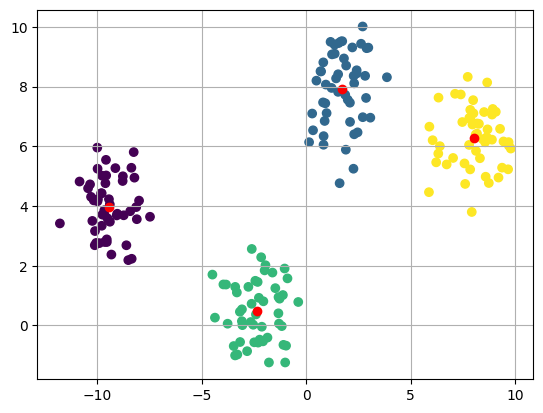

In [114]:
# 2. 비지도 학습 (Unsupervised Learning)
# 정답이 없다
# 군집, 차원 축소, 이상 탐지

# 목표 : 이러한 모델이 있더라
# 팀 프로젝트 서비스, 프로젝트

# 1) 군집 알고리즘(Clustering)

from sklearn.datasets import make_blobs # 군집용 데이터 생성
from sklearn.cluster import KMeans # 군집 알고리즘

X, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.0, random_state=20)
k = 3

kmeans = KMeans(n_clusters=4, random_state=20)
kmeans.fit(X) # split 안하나요 ? --> 비지도 학습

# 학습 후 2개의 정보 확인
centors = kmeans.cluster_centers_  # 중심점 좌표
labels = kmeans.labels_            # 군집된 결과

# 군집 데이터 시각화
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centors[:, 0], centors[:, 1], c="r")
plt.grid(True)
plt.show

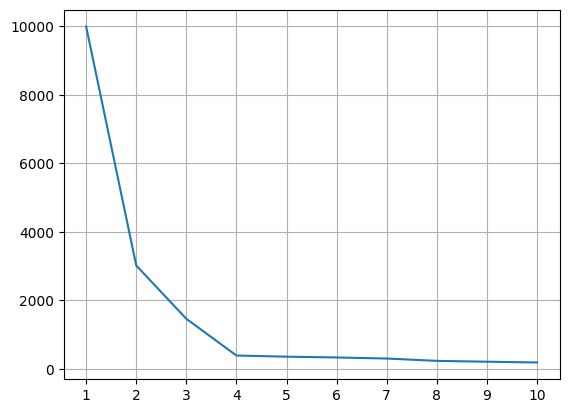

In [117]:
# 군집에서 적절한 군집수(k) 찾기
# 엘보우 기법!!
k_range = range(1, 11)
inertia_list = []
for k in k_range:
    kmeans_test = KMeans (n_clusters=k, random_state=20, n_init="auto")
    kmeans_test.fit(X)
    inertia_list.append(kmeans_test.inertia_) # 각 데이터와 중심점 사이의 거리

plt.plot(k_range, inertia_list)
plt.grid(True)
plt.xticks(k_range)
plt.show()

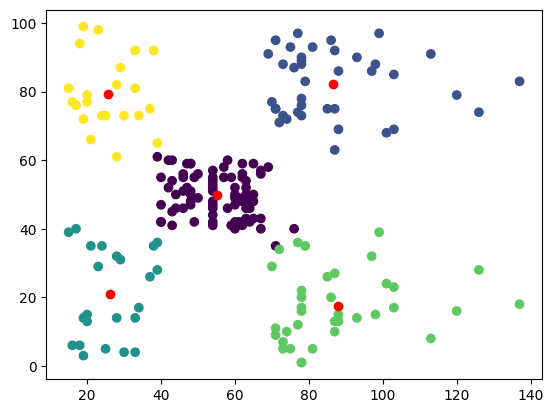

In [127]:
# 쇼핑몰 데이터
import pandas as pd
df = pd.read_csv("https://github.com/nayeho/robot/raw/refs/heads/main/Mall_Customers.csv")
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
# Pandas DataFrame.value -> array로 바뀐다
X.values.shape  # 200개 데이터, 2개의 feature

X = X.values

# 이 X를 가지고
# 군집 알고리즘 KMeans를 활용하여
# ???개의 군집으로 분류하시오
# 군집별 시각화!!

# 쇼핑몰 k 값 찾는 엘보우 기법
from sklearn.cluster import KMeans
# k_range = range(1, 11)
# inertia_list = []
# for k in k_range:
#     kmeans_test = KMeans(n_clusters=k, random_state=20, n_init="auto")
#     kmeans_test.fit(X)
#     inertia_list.append(kmeans_test.inertia_)

# plt.plot(k_range, inertia_list)
# plt.grid(True)
# plt.xticks(k_range)
# plt.show()

kmeans = KMeanskmeans = KMeans(n_clusters=5, random_state=20, n_init="auto")
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="red")
plt.show()

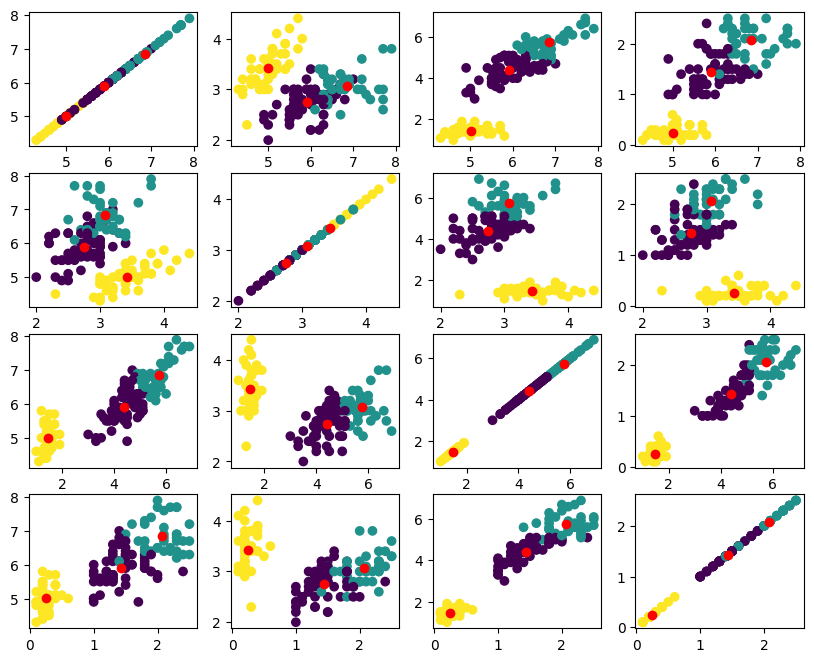

In [147]:
# feature가 2개가 아닌 것들도 군집화 할 수 있나요 ?
# 네!
# 붓꽃 feature는 4개
from sklearn.datasets import load_iris
iris_dataset = load_iris()
X= iris_dataset.data
X.shape  # (150, 4)

# k_range = range(1, 11)
# inertia_list = []
# for k in k_range:
#     kmeans_test = KMeans(n_clusters=k, random_state=20, n_init="auto")
#     kmeans_test.fit(X)
#     inertia_list.append(kmeans_test.inertia_)
# plt.plot(k_range, inertia_list)
# plt.grid(True)
# plt.xticks(k_range)
# plt.show()

# k=3으로 확정!!!

kmeans = KMeans(n_clusters=3, random_state=20, n_init="auto")
kmeans.fit(X)

centors = kmeans.cluster_centers_
labels = kmeans.labels_
# feature 2개씩 추출해서 2차원으로 확인해보자
# 4 X 4 캔버스를 만들어서 16개 한꺼번에 확인!!
fig, axis = plt.subplots(4, 4, figsize = (10, 8))
for i in range(4):
    for j in range(4):
        axis[i, j].scatter(X[:, i], X[:, j], c=labels)
        axis[i, j].scatter(centors[:, i], centors[:, j], c="red")
plt.show()


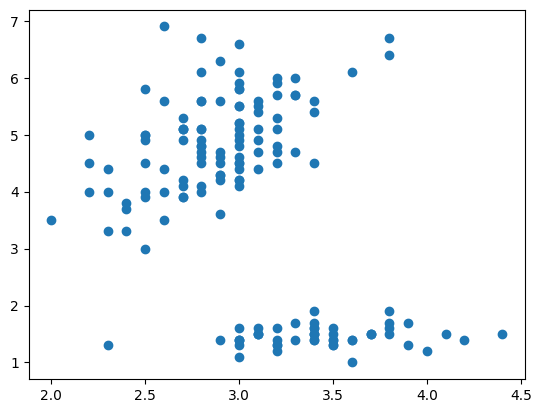

In [149]:
# 군집 KMeans
plt.scatter(X[:, 1], X[:, 2])
plt.show()

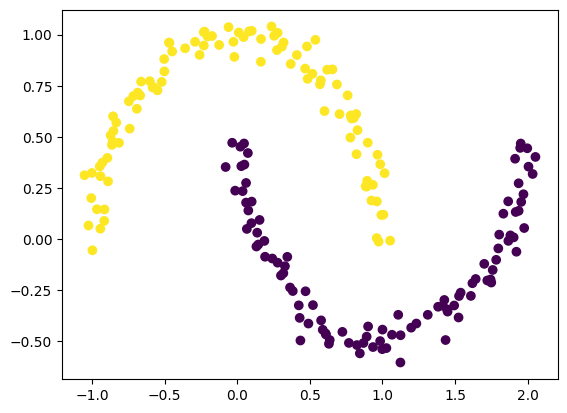

In [163]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=20)

# =========KMeans로 했을 때 안됨=============
# k = 2
# kmeans = KMeans(n_clusters=k, random_state=20, n_init="auto")
# kmeans.fit(X)

# centors = kmeans.cluster_centers_
# plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
# plt.scatter(centors[:, 0], centors[:, 1], c="red")
# plt.show()
# ===========================================

# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)
# 데이터 밀도 기반
# 밀도가 낮으면 노이즈 처리
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.15, min_samples=5)
cluster = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=cluster)
plt.show()


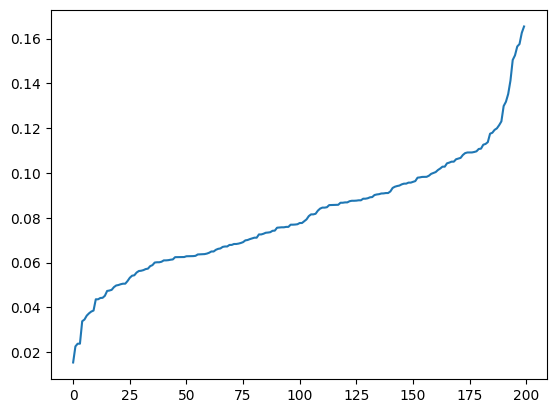

In [173]:
# 신나는 eps 찾기!!
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=200, noise=0.05, random_state=20)

e = 0.3
# min_samples는 보편적으로 feature의 2배 정도로 설정한다
dbscan = DBSCAN(eps=e, min_samples=5) # eps : 군집 반지름
# min_samples에 따른 eps
# min_samples가 5 -> 나로부터 4개의 점 사이의 거리 계산!!

# 이웃과 거리만 계산하기
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=4)
neighbors = nn.fit(X)
distance, indicate = neighbors.kneighbors(X)

import numpy as np
distance_sorted = np.sort(distance[:, 3], axis=0)
plt.plot(distance_sorted)
plt.show()

# cluster = dbscan.fit_predict(X)
# plt.scatter(X[:, 0], X[:, 1], c=cluster)
# plt.show()

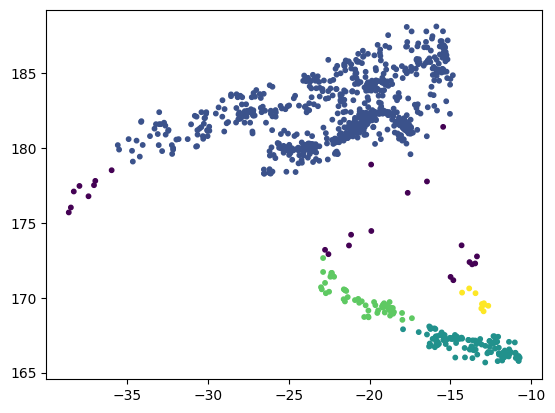

In [194]:
# 실제 피지 지진 데이터 군집
df_eq = pd.read_csv("https://github.com/nayeho/robot/raw/refs/heads/main/quakes.csv")
df_eq

# lat, long 가지고 새로운 df
X = df_eq[["lat", "long"]].values
X.shape

# DBSCAN 활용 eps=1.0, min_samples=5
# 시각화까지 진행!!

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5)
cluster = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s=10, c=cluster)
# DBSCAN의 특장점 ! 군집 개수 설정 안해도 됨!!
# 단점 eps 정해야함.
plt.show()

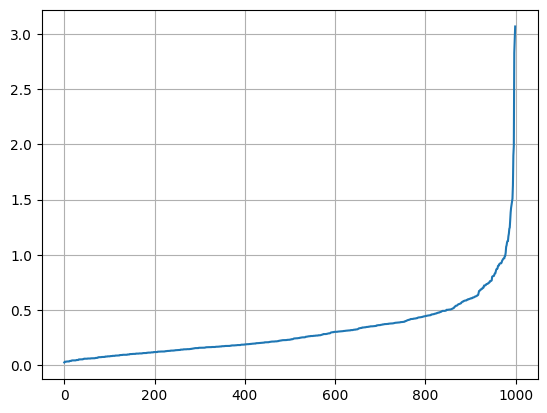

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=e, min_samples=5)

from sklearn.neighbors import NearestNeighbors
nn2 = NearestNeighbors(n_neighbors=4)
neighbors2 = nn2.fit(X)
distance, indicate = neighbors2.kneighbors(X)

import numpy as np
distance_sorted = np.sort(distance[:, 3], axis=0)
plt.plot(distance_sorted)
plt.grid(True)
plt.show()  # knee 기법 활용 eps 찾기 (완만해지는 지점)

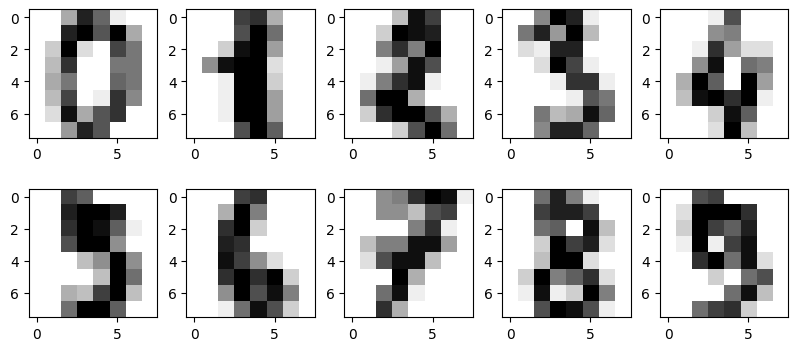

In [207]:
# 차원 축소
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
X.shape

import matplotlib.pyplot as plt
# 이전의 subplots 활용해서 캔버스 그리고
# 10 ~ 20개 출력
fig, axis = plt.subplots(2, 5, figsize=(10, 4),
                         gridspec_kw=dict(hspace=0.4, wspace=0.1))
count = 0
for i in range(2):
    for j in range(5):
        axis[i, j].imshow(X[count].reshape(8, 8), cmap="binary")
        count += 1
plt.show()

In [215]:
# 차원 축소
# 각 데이터가 64개의 feature를 가지고 있다
# feature중에 해당 데이터를 잘 나타내는 feature를 위주로 축소
# 조건 : 줄여진 data가 원본 data를 잘 나타내야 함
digits = load_digits()
X = digits.data
y = digits.target
print(f"원본 데이터 차원 : {X.shape}")

# PCA 모델 : 주 성분 분석 (Principal component analysis)
# 원본데이터의 분산이 가장 큰 방향을 새로운 축으로 하여 데이터 투영
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
X_pca = pca.fit_transform(X)
print(f"축소된 데이터 차원 : {X_pca.shape}")
# 축소된 데이터가 원본을 얼마나 반영하는가
print(f"원본 반영 비율 : {sum(pca.explained_variance_ratio_) * 100: .2f}%")

원본 데이터 차원 : (1797, 64)
축소된 데이터 차원 : (1797, 16)
원본 반영 비율 :  84.94%


In [ ]:
# 이상 탐지
# 연관 규칙 분석(Asscociation Rule Mining)

dataset = [
    ['우유', '계란', '빵'],
    ['우유', '기저귀', '맥주', '감자칩'],
    ['계란', '빵', '주스'],
    ['우유', '기저귀', '맥주', '콜라'],
    ['빵', '계란', '우유'],
    ['기저귀', '맥주', '주스'],
    ['빵', '콜라'],
    ['우유', '계란', '빵', '감자칩'],
    ['기저귀', '맥주'],
    ['우유', '빵']
]
# 학습, 분석
# 인코딩
# 3, 2.5 -> 수치형 데이터
# "우유", "맥주", "male", "female" -> 범주형 데이터
# 1) 레이블 인코딩

# 전체 리스트를 탐색하여
# 처음 보는 데이터면 0 ~ 1, 2, 3 순으로 숫자를 부여
# 모든 데이터를 바꿔주세요 
# 단, 우유 3으로 해도 됨
# 같은 품목이면 같은 숫자면 된다. 100, 1000도 가능

# Python의 dic {key:vale}
# {1, 2, 3, 3, 2, 5} -> 중복 없는 자료구조 (Set)
# {1, 2, 3, 5}

# 1) 중복없이
item_list = []
for data in dataset:
    for d in data:
        item_list.append(d)
item_list = (list(set(item_list))) # 공간복잡도 엉망진창

item_list.sort()

dic_item = {}
count = 0
for item in item_list:
    dic_item[item] = count
    count += 1
dic_item

label_encoded = []
for data in dataset:
    temp = []
    for d in data:
        temp.append(dic_item[d])
    label_encoded.append(temp)
label_encoded

# 우유(5)가 과연 계란(1)보다 5배의 가치가 있느냐?
# One-Hot Encoding 수요일!!
# 내일은 신나는 PyQt를 활용하여 어플리케이션, 게임 만들어보자
# 수요일 딥러닝 기초!

# 목표 : 아! 그 모델! 들어봤는데?

[[5, 1, 4],
 [5, 2, 3, 0],
 [1, 4, 6],
 [5, 2, 3, 7],
 [4, 1, 5],
 [2, 3, 6],
 [4, 7],
 [5, 1, 4, 0],
 [2, 3],
 [5, 4]]